Coeficiente de correlación:  0.9227

Coeficiente de determinación:  0.8514

Intervalo de confianza para b1 de  98%
 5.2890 < b1 <  6.1729



,df,sum_sq,mean_sq,F,PR(>F)
Duration,1.0,9.847530e+06,9.847530e+06,928.219489,5.795220e-69
Residual,162.0,1.718667e+06,1.060905e+04,NaN,NaN


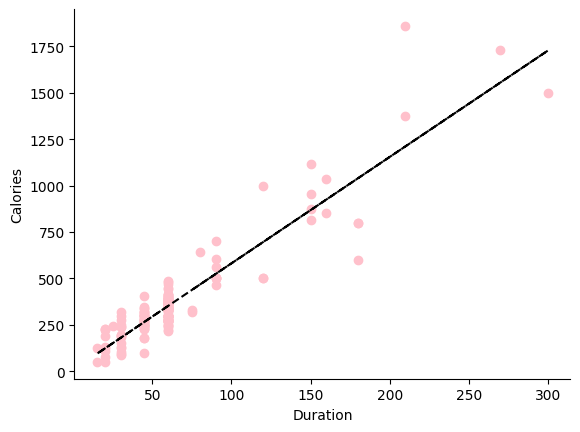

In [ ]:
#Sandoval Santos Jacqueline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/Jacqueline030409/Estadistica-Inferencial-II/refs/heads/main/data.csv")
df.dropna(inplace = True) 
df

X= df["Duration"]
Y= df["Calories"]


plt.scatter(X, Y, color = 'pink')
plt.xlabel('Duration')
plt.ylabel('Calories')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


import statsmodels.api as sm
x_constante = sm.add_constant(X)
modelo = sm.OLS(Y, x_constante).fit()

b0, b1 = modelo.params

fun = lambda x: b0 + b1 * x

Yc = fun(X)

plt.plot(X, Yc, color = 'black', linestyle = '--')

from scipy.stats import pearsonr
r, _ = pearsonr(X, Y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')

print(f'Coeficiente de determinación: {r ** 2: 0.4f}\n')

# Interpretacion de resultados: 
# El coeficiente de correlación con un valor de 0.9227 nos indica que la relación entre las 2 variables es altamente positiva, ya que cuando una aumenta la otra lo hace también.

# El coeficiente de determinación de 0.8514 nos muestra que el 85.14% de la variabilidad de la variable dependiente se debe a su estrecha relación con la variable independiente 

nivel_de_confianza = 0.98
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')



from statsmodels.formula.api import ols
# Y ~ X
modelo_2 = ols('Calories ~ Duration', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_2)
tabla_anova

#El intervalo de confianza del 98% para la pendiente (b1) es 5.2890 < 𝑏1 < 6.1729 lo que indica que por cada unidad que aumenta la variable independiente, la dependiente crece entre 5.2890 y 6.1729 unidades.
#El ANOVA muestra un F de 928.22 y un p-valor muy pequeño (5.7952e-69), confirmando que la variable independiente influye significativamente en la dependiente.
